In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv')

Pregnancies — Number of times pregnant

GlucosePlasma — glucose concentration 2 hours in an oral glucose tolerance test

Blood Pressure — Diastolic blood pressure (mm Hg)

SkinThickness — Triceps skin-fold thickness (mm)

Insulin — Two hours of serum insulin (mu U/ml)

BMI — Body mass index (weight in kg/(height in m)²)

Diabetes Pedigree Function — Diabetes pedigree function

Age — Age in years

Outcome — Class variable (0 or 1)

In [3]:
# adding column name to the respective columns
df.columns =['pregnant_count',
                'plasma_glucose',
                'bp',
                'skin_thickness',
                'insulin',
                'bmi',
                'dpf',
                'age',
                'Outcome']

# displaying the DataFrame
df

,pregnant_count,plasma_glucose,bp,skin_thickness,insulin,bmi,dpf,age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.head()

,pregnant_count,plasma_glucose,bp,skin_thickness,insulin,bmi,dpf,age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
df.describe()

,pregnant_count,plasma_glucose,bp,skin_thickness,insulin,bmi,dpf,age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.shape

(767, 9)

In [7]:
df.isnull().sum()

pregnant_count    0
plasma_glucose    0
bp                0
skin_thickness    0
insulin           0
bmi               0
dpf               0
age               0
Outcome           0
dtype: int64

# Visualization

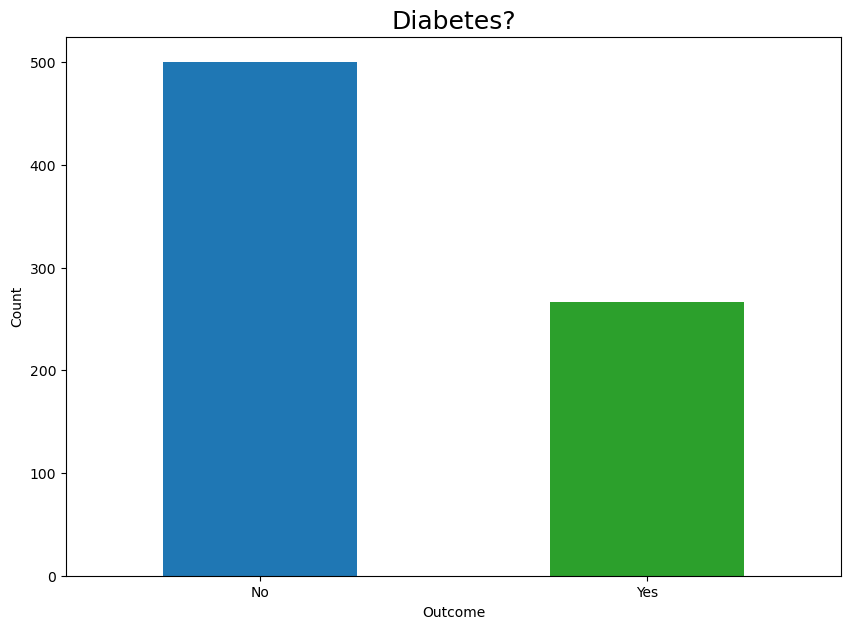

In [8]:
outcome_counts = df['Outcome'].value_counts()

fig, ax = plt.subplots(figsize=(10, 7))
outcome_counts.plot(kind='bar', ax=ax, color=[sns.color_palette()[0], sns.color_palette()[2]], rot=0)
ax.set_title("Diabetes?", fontsize=18)
ax.set_xticklabels(["No", "Yes"])
ax.set_xlabel("Outcome")
ax.set_ylabel("Count")

plt.show()


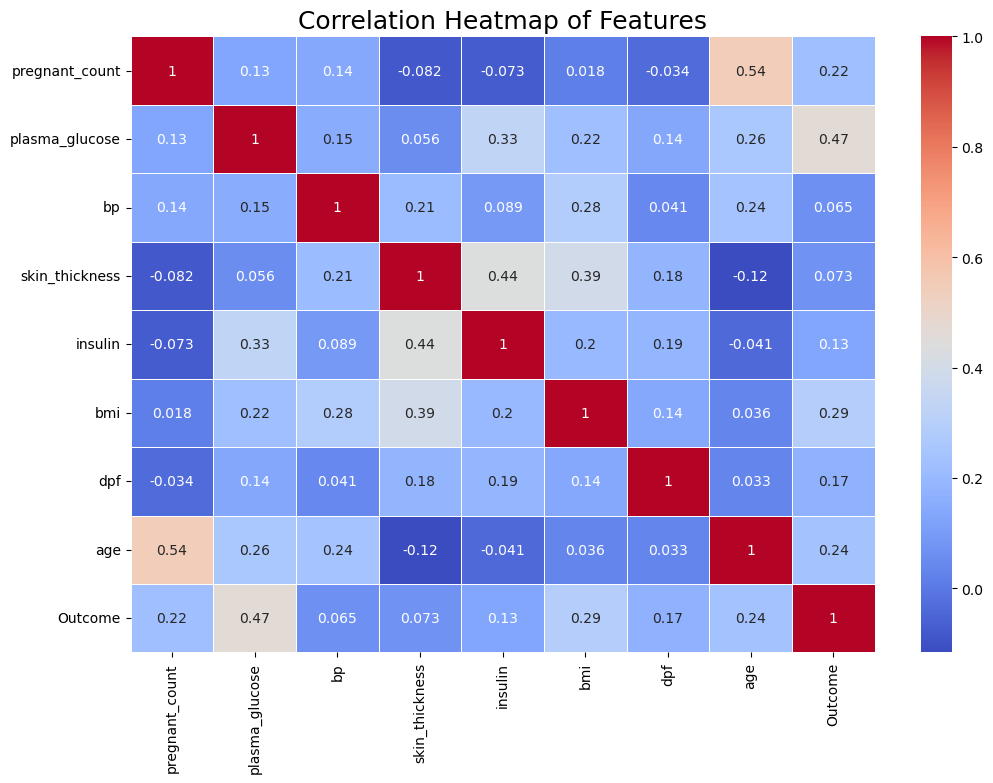

In [9]:
#Heat map
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features', fontsize=18)
plt.show()


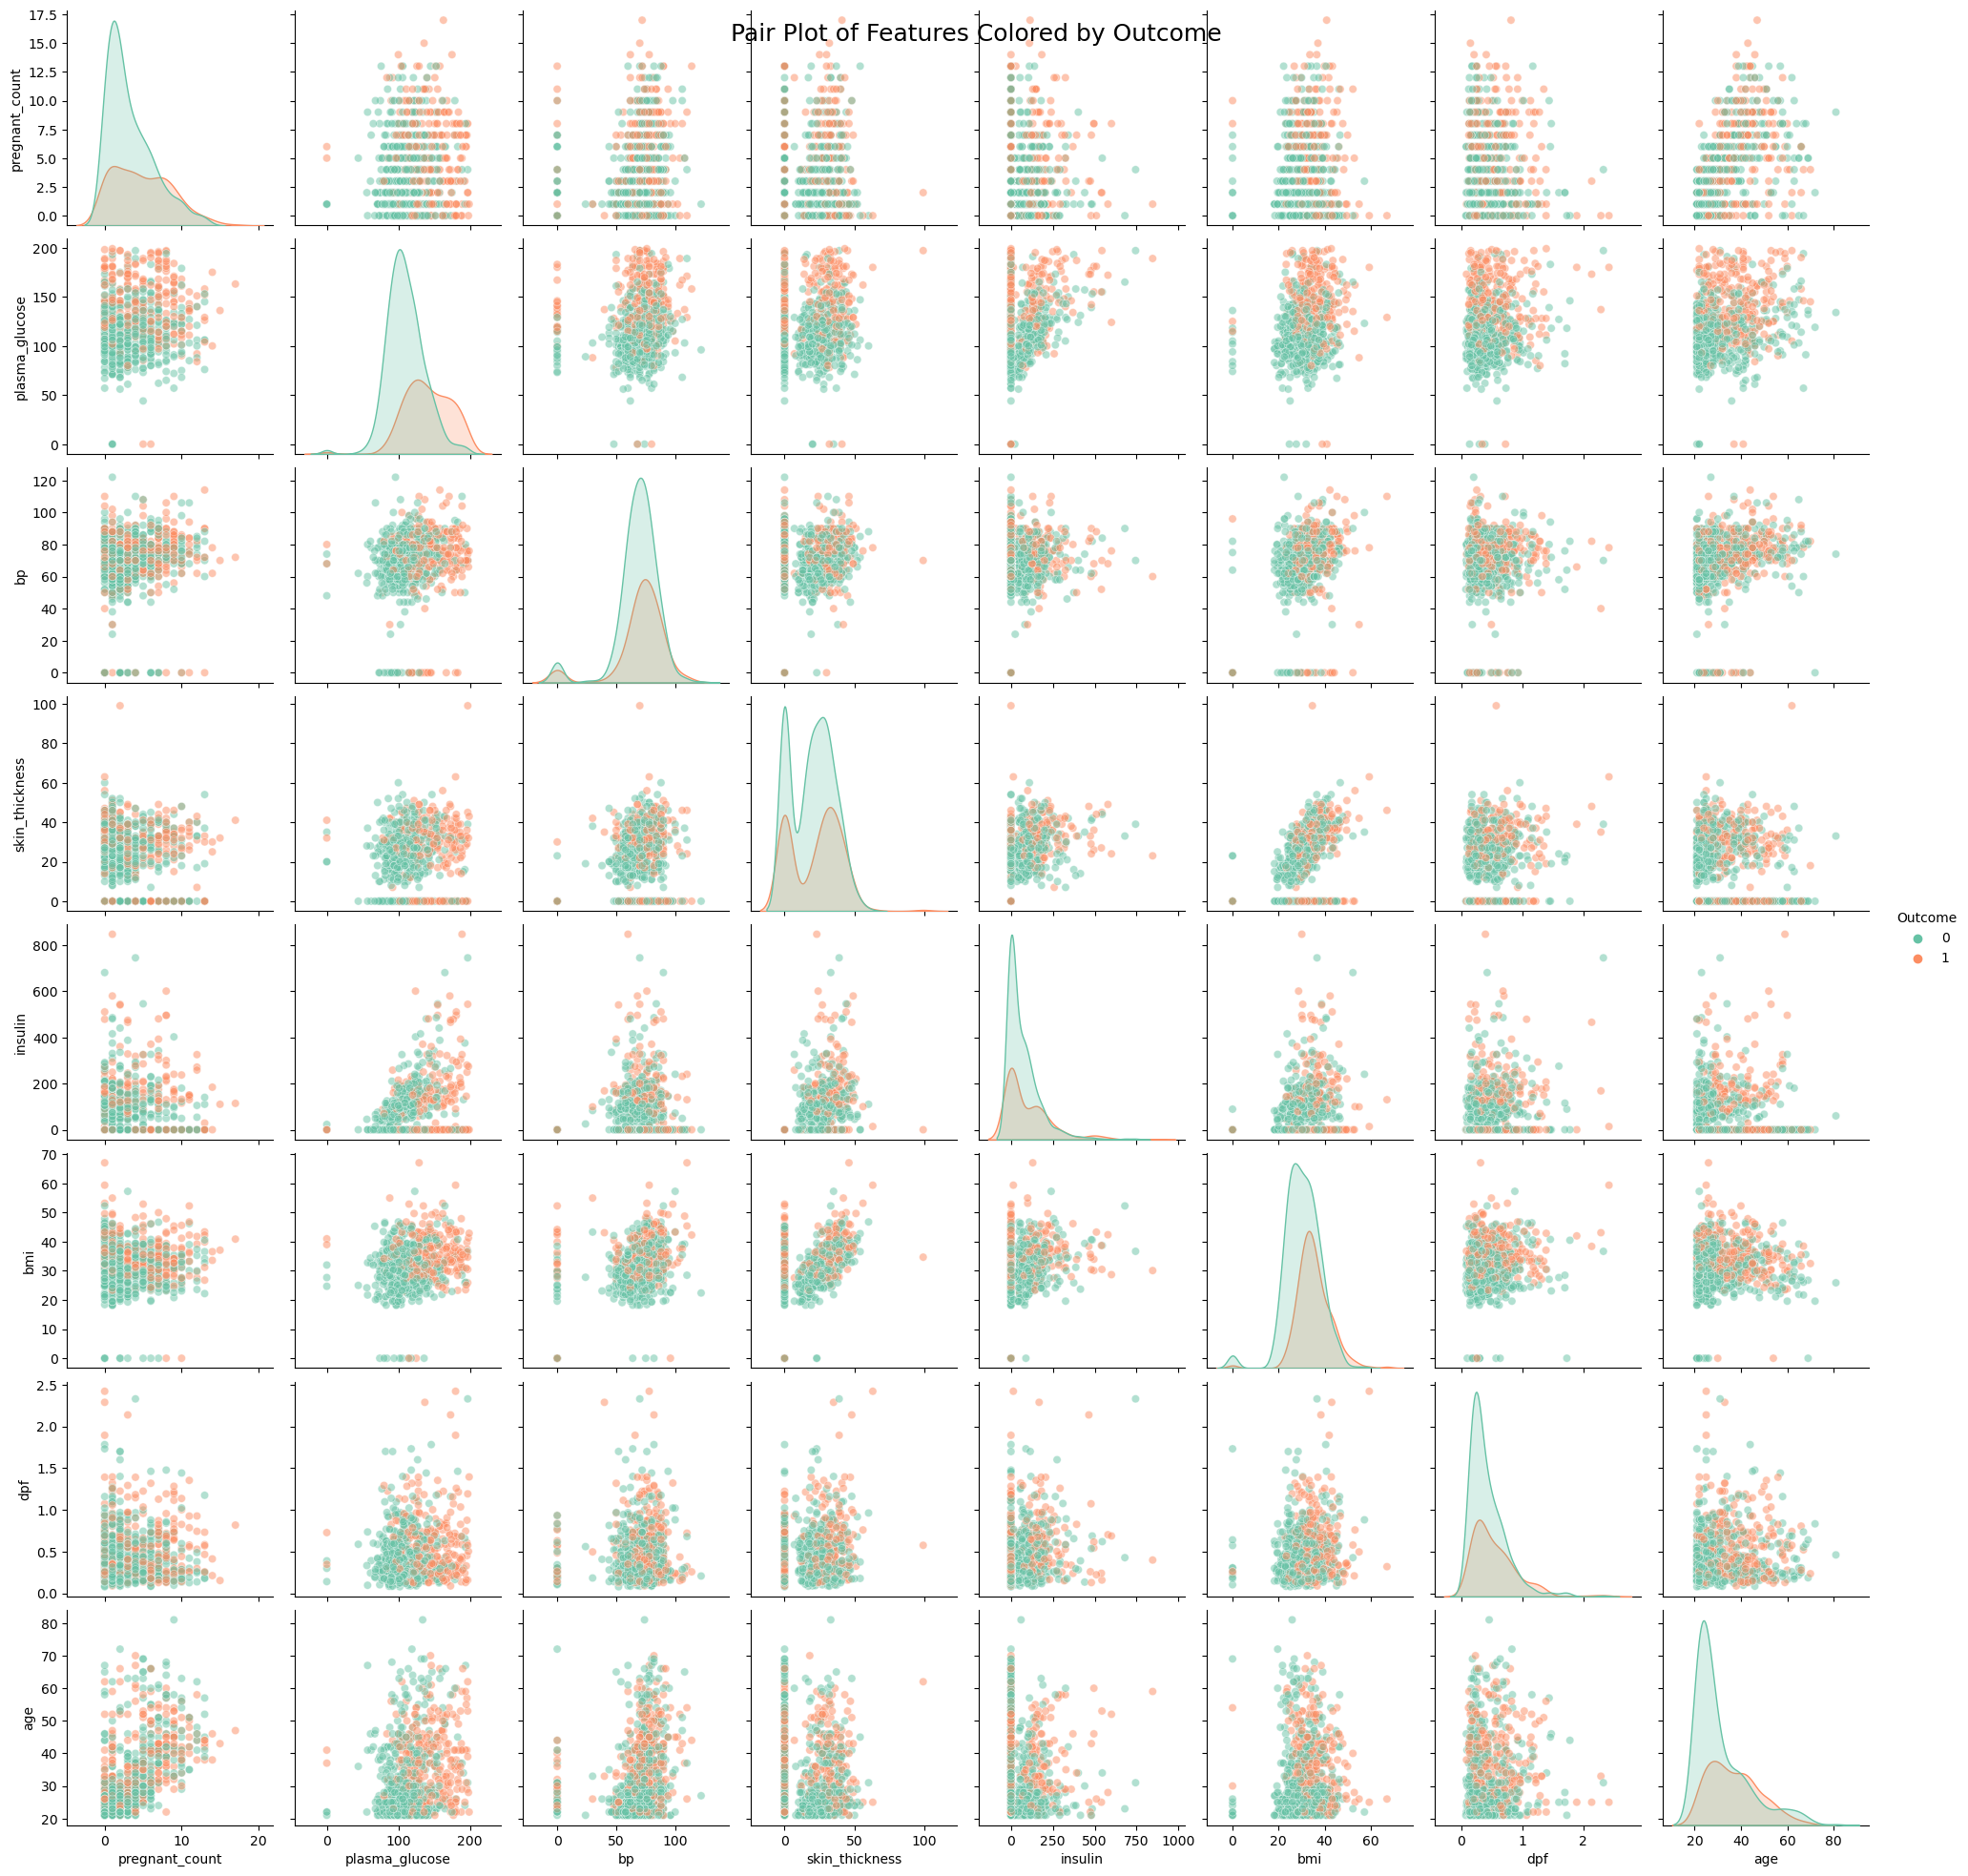

In [10]:
#pairplot
sns.pairplot(df, hue='Outcome', palette="Set2", plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Features Colored by Outcome', fontsize=18)
plt.show()

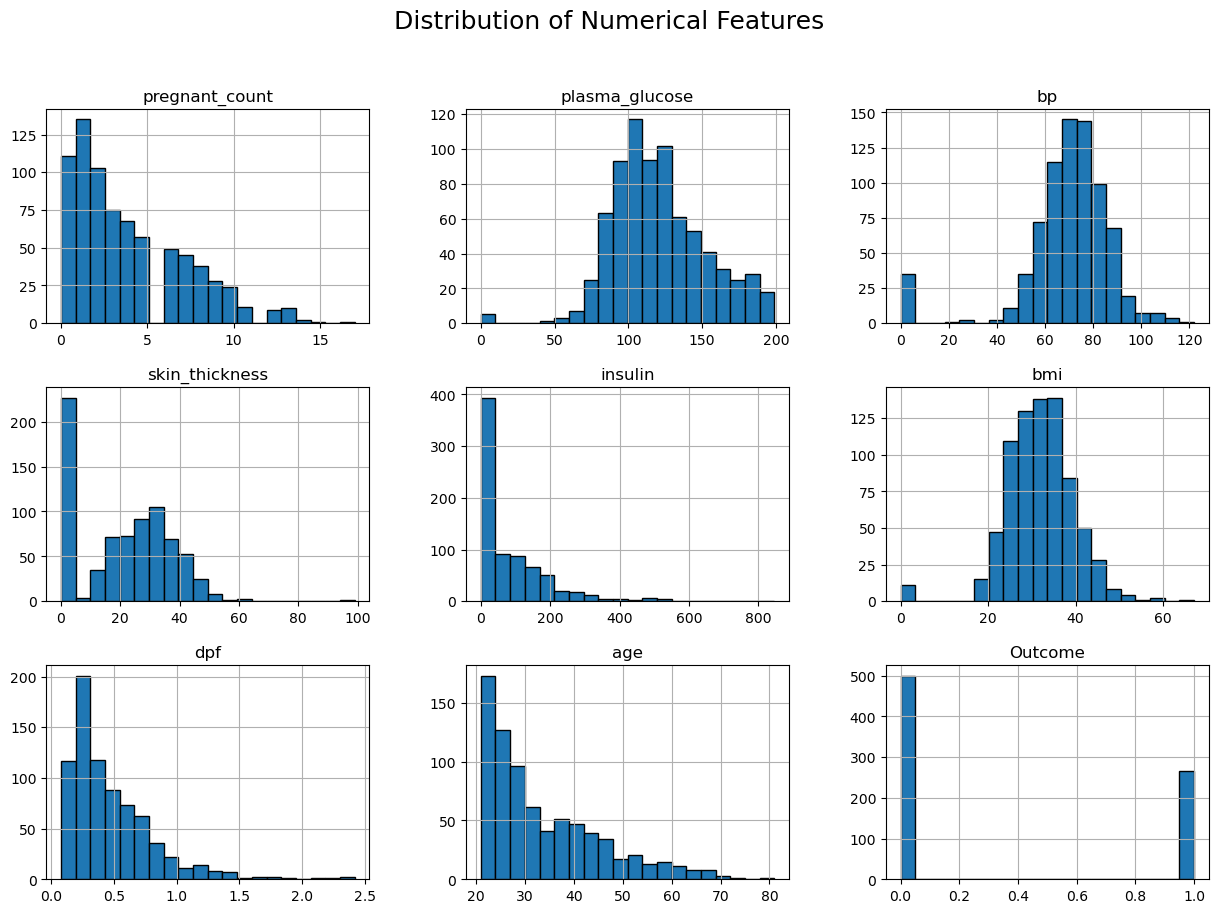

In [11]:
# Histograms for Numerical Features
df.hist(figsize=(15, 10), bins=20, color='#1f77b4', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=18)
plt.show()


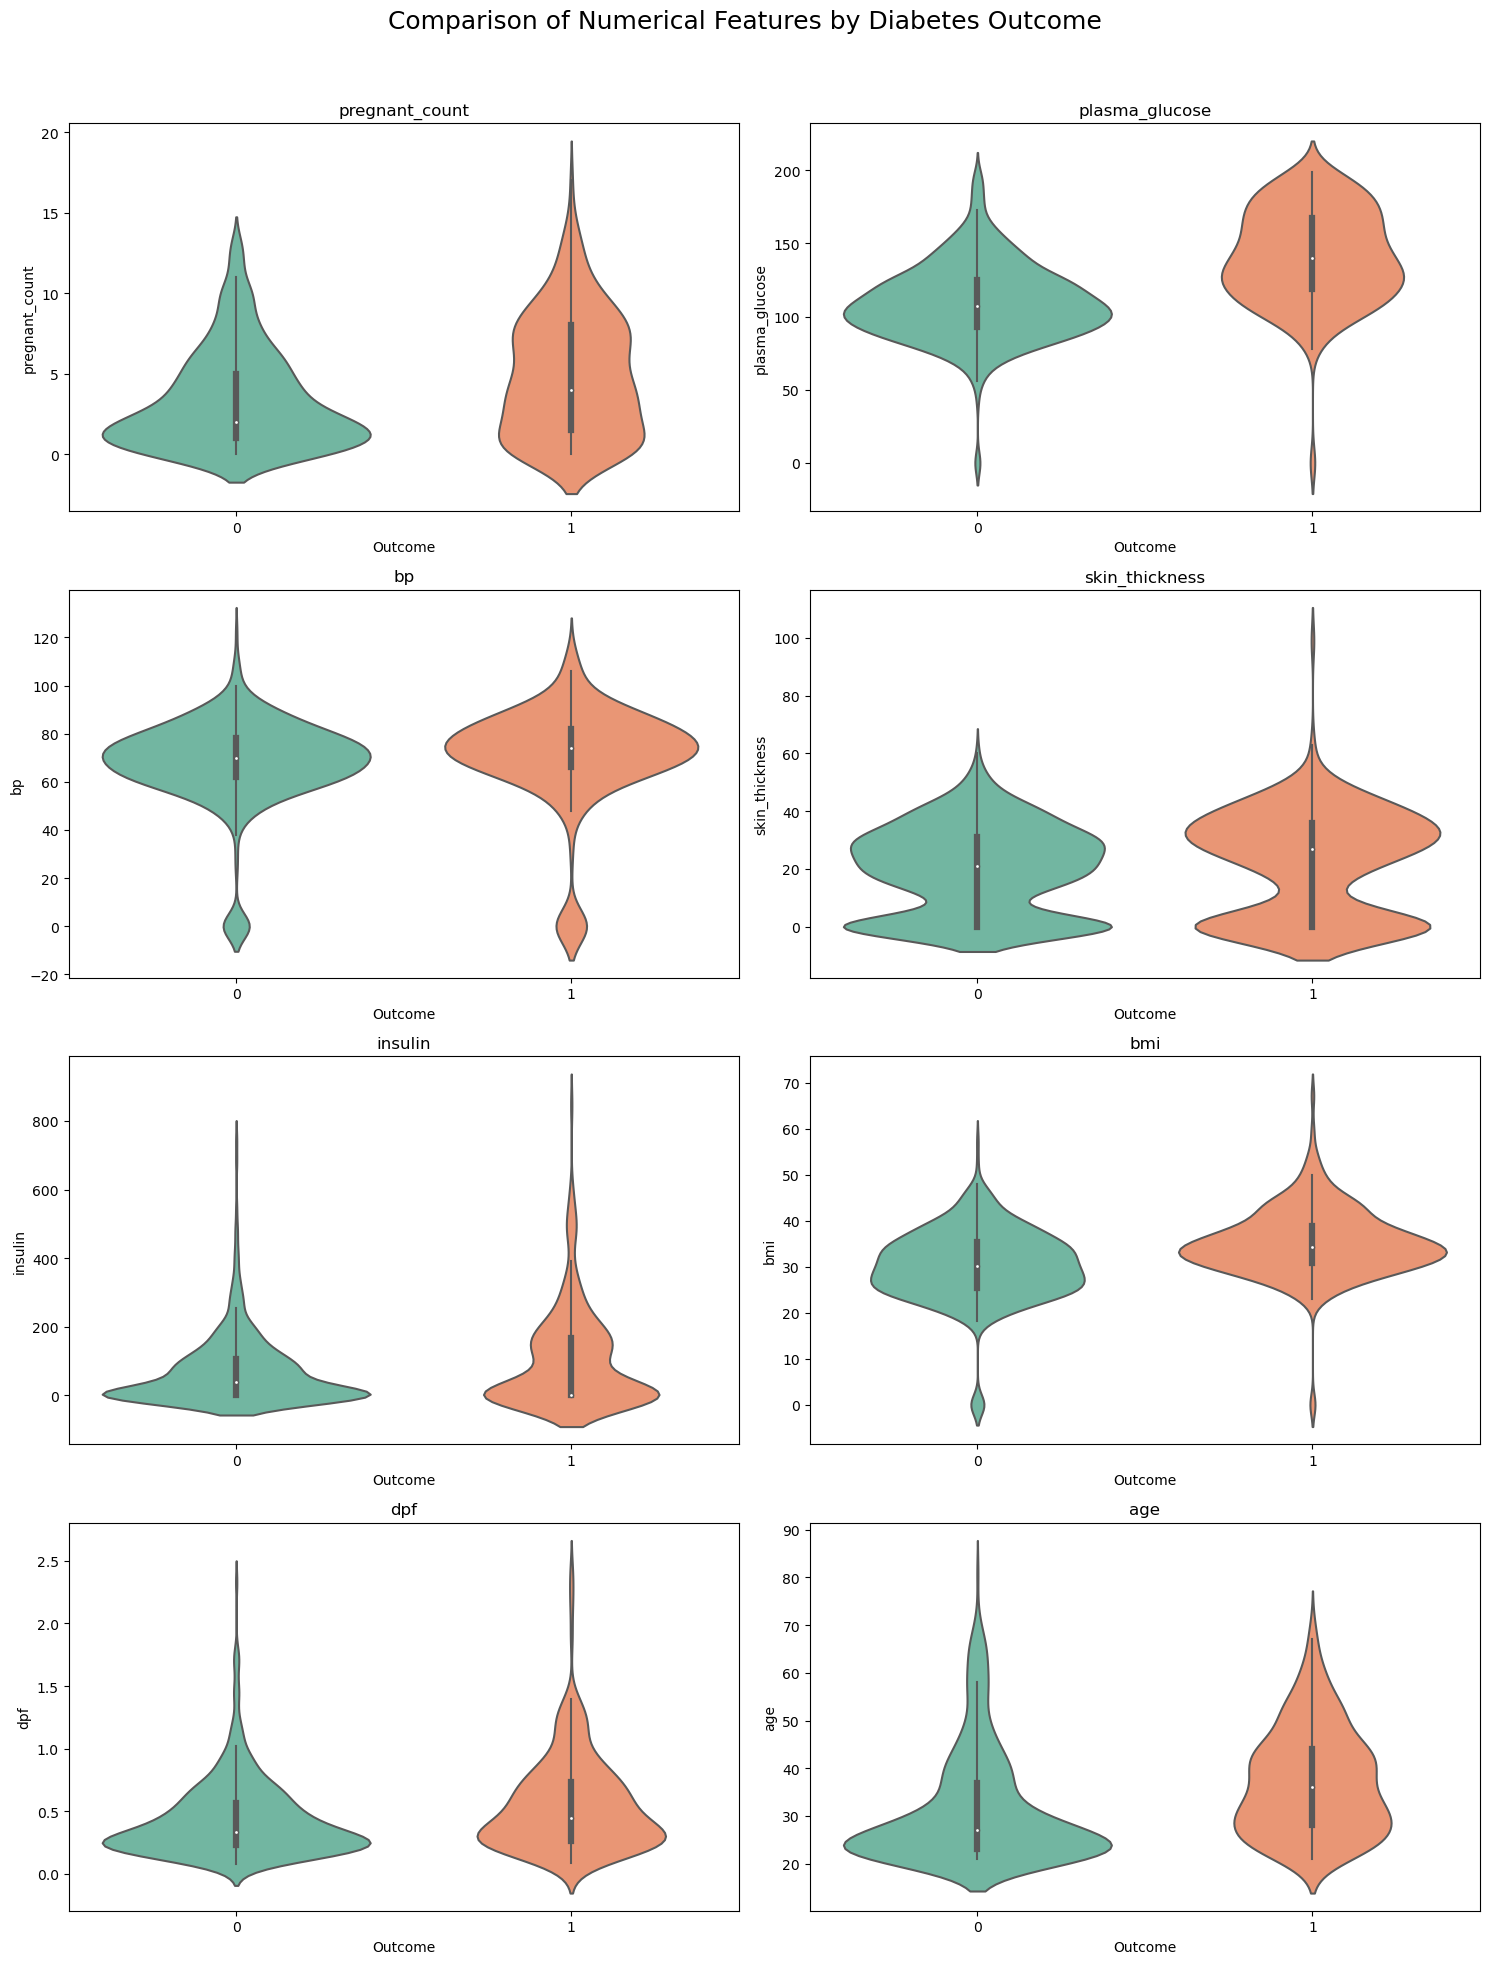

In [12]:
# Violin plots by Outcome
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Comparison of Numerical Features by Diabetes Outcome', fontsize=18)

features = ['pregnant_count', 'plasma_glucose', 'bp', 'skin_thickness', 'insulin', 'bmi', 'dpf', 'age']

for i, ax in enumerate(axes.flatten()):
    sns.violinplot(x='Outcome', y=features[i], data=df, ax=ax, palette="Set2")
    ax.set_title(features[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Splitting the train and test

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [14]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [15]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Logistic regression

Accuracy: 80.73%


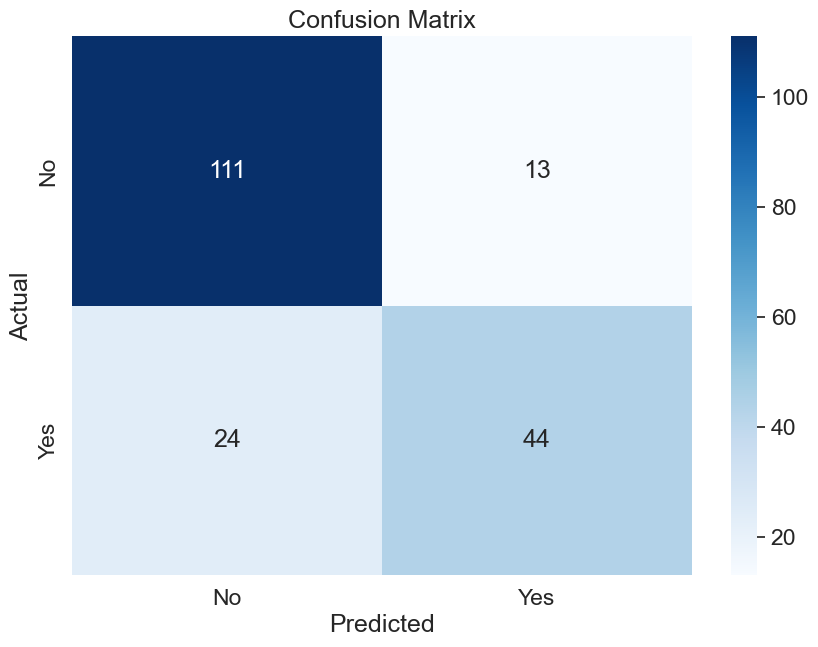

In [16]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model with increased iterations
LR = LogisticRegression(max_iter=200)

# Fitting the model
LR.fit(X_train_scaled, y_train)

# Prediction
y_pred = LR.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {:.2f}%".format(accuracy))

# Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Neural Network Regression


Accuracy: 72.92%


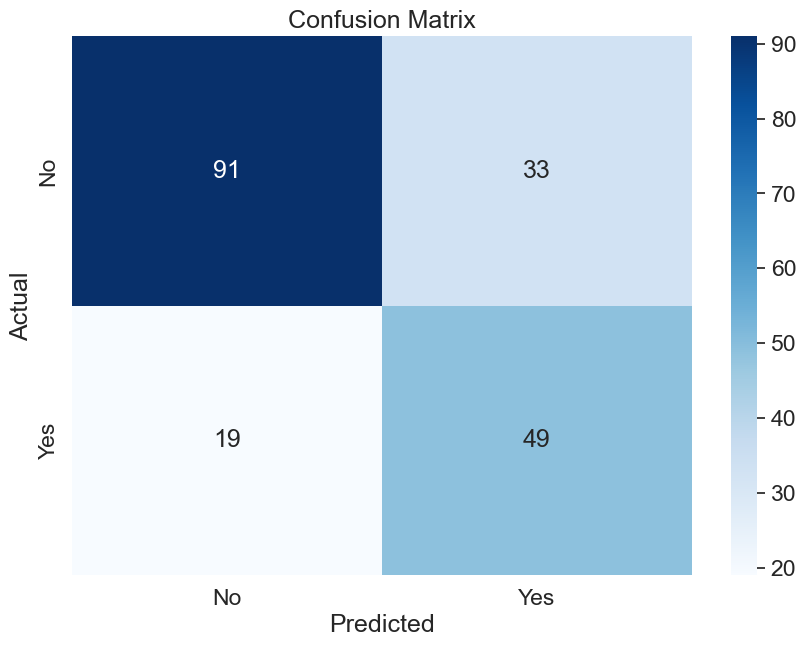

In [18]:
from sklearn.neural_network import MLPClassifier

# Initialize the Neural Network model with increased max_iter and learning_rate_init
nn_model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, learning_rate_init=0.001, random_state=42)

# Fitting the model
nn_model.fit(X_train_scaled, y_train)

# Prediction
y_pred = nn_model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {:.2f}%".format(accuracy))

# Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Lasso Regression

Mean Squared Error: 0.18464163263050937
R^2 Score: 0.19276219813910123


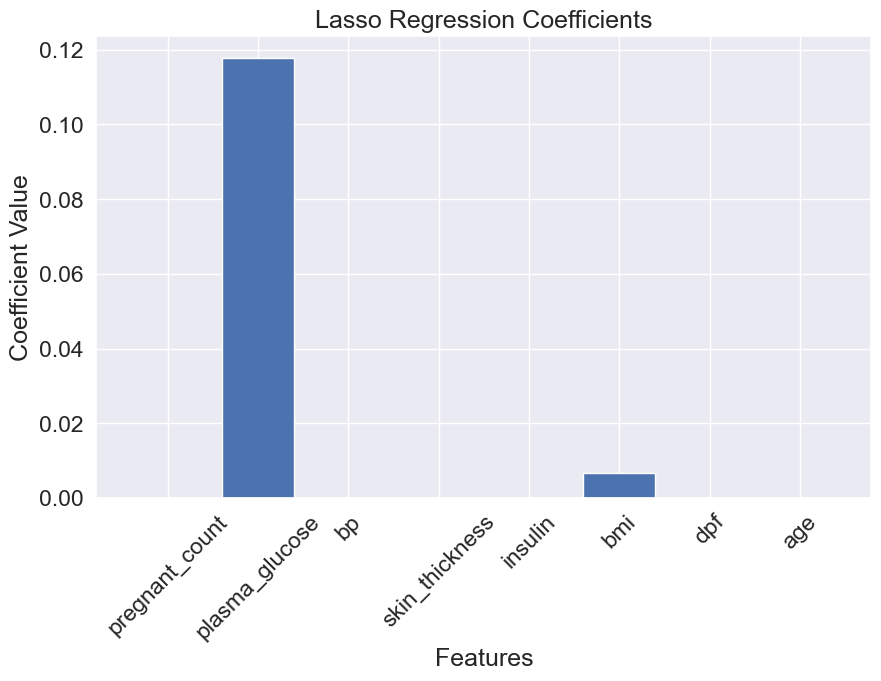

In [19]:
# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=0.1, random_state=42)

# Fitting the model
lasso_model.fit(X_train_scaled, y_train)

# Prediction
y_pred = lasso_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plotting coefficients
plt.figure(figsize=(10, 6))
plt.bar(X.columns, lasso_model.coef_)
plt.title("Lasso Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()